In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'/kaggle/input/playground-series-s4e7/train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
5,5,Female,31,1,47.0,1,< 1 Year,No,28150.0,152.0,197,0
6,6,Male,23,1,45.0,1,< 1 Year,No,27128.0,152.0,190,0
7,7,Female,47,1,8.0,0,1-2 Year,Yes,40659.0,26.0,262,1
8,8,Female,26,1,28.0,1,< 1 Year,No,31639.0,152.0,36,0
9,9,Female,66,1,11.0,0,1-2 Year,Yes,2630.0,26.0,125,0


In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.shape

(11504798, 12)

In [7]:
df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [3]:
df_1 = df[df['Response']==1]
df_2 = df[df['Response']==0]

In [4]:
df_2 = df_2.sample(df_1.shape[0])

In [5]:
df_vis = pd.concat([df_1,df_2])
df_vis.shape

(2830118, 12)

In [7]:
df_vis.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
7,7,Female,47,1,8.0,0,1-2 Year,Yes,40659.0,26.0,262,1
28,28,Male,40,1,35.0,0,1-2 Year,Yes,2630.0,157.0,204,1
36,36,Female,50,1,46.0,0,1-2 Year,Yes,29248.0,124.0,273,1
44,44,Male,40,1,8.0,0,1-2 Year,Yes,36217.0,124.0,286,1


In [31]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

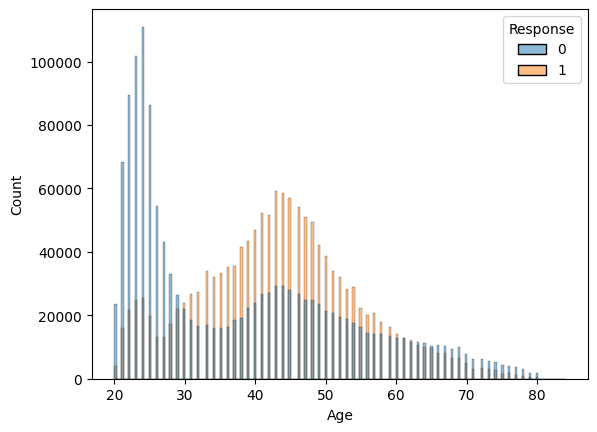

In [39]:
sns.histplot(data = df_vis, x='Age', hue = 'Response')

<Axes: xlabel='Response', ylabel='Age'>

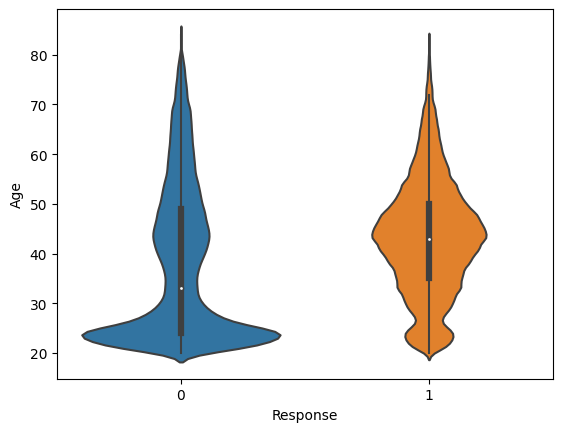

In [40]:
sns.violinplot(data = df_vis, x = 'Response', y = 'Age')

In [6]:
df_vis2 = df_vis.sample(10000)

<Axes: xlabel='Gender', ylabel='Response'>

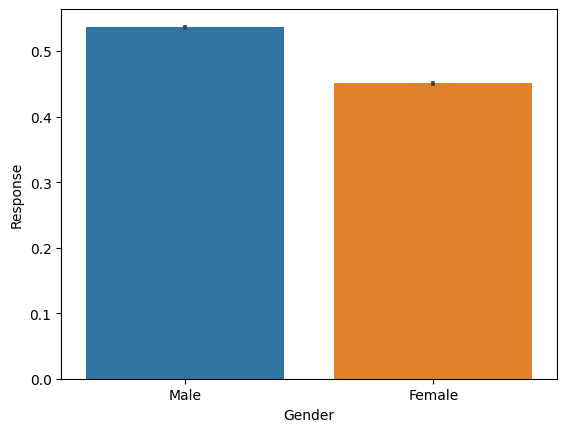

In [58]:
sns.barplot(data = df_vis, x = 'Gender', y ='Response')

<Axes: xlabel='Driving_License', ylabel='Response'>

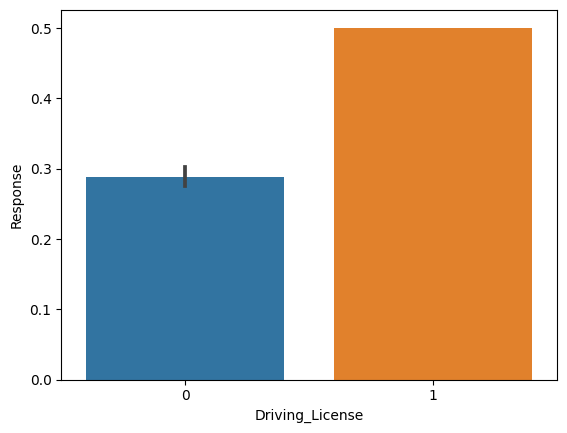

In [57]:
sns.barplot(data = df_vis, x = 'Driving_License', y = 'Response')

<Axes: xlabel='Response', ylabel='Region_Code'>

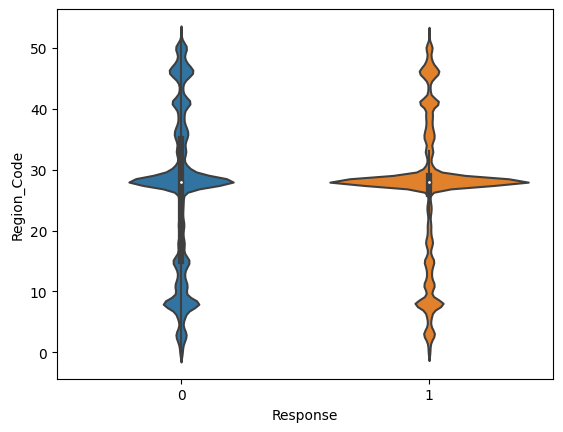

In [11]:
sns.violinplot(data = df_vis, x ='Response', y = 'Region_Code')

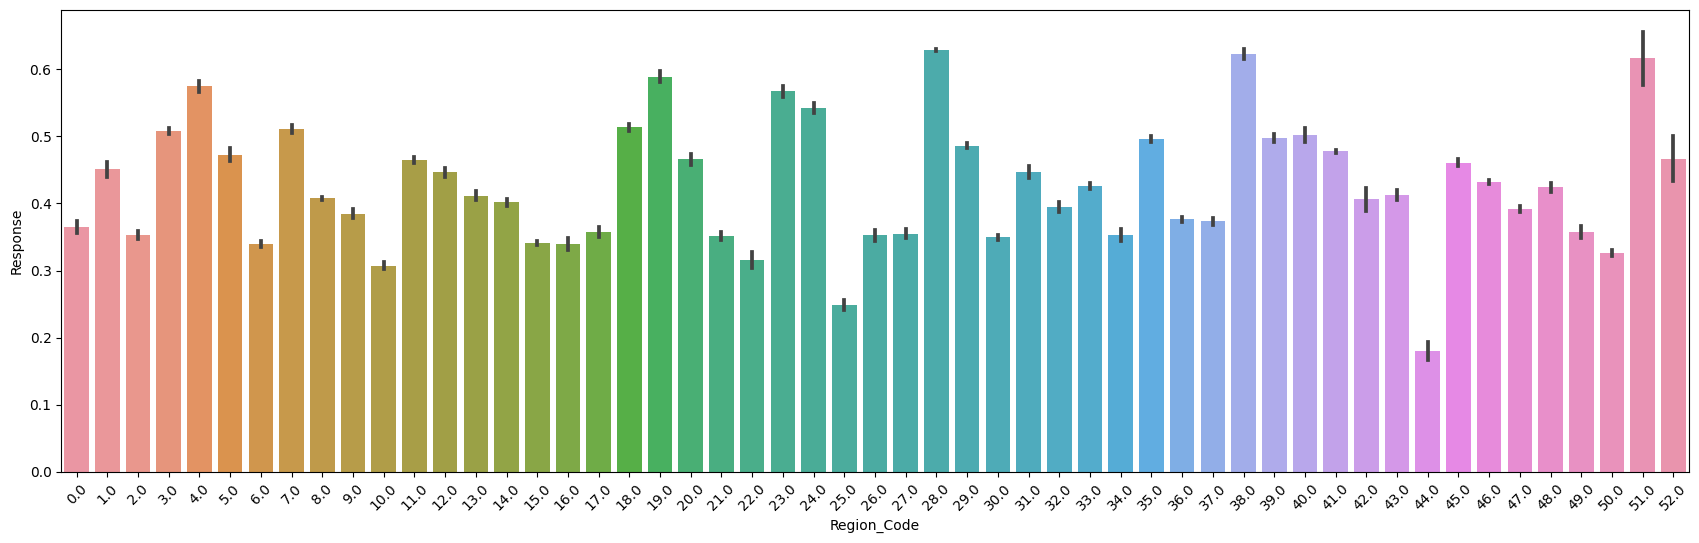

In [75]:
plt.figure(figsize=(21, 6))
sns.barplot(data=df_vis, x='Region_Code', y='Response')

# Tilt x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

<Axes: xlabel='Previously_Insured', ylabel='Response'>

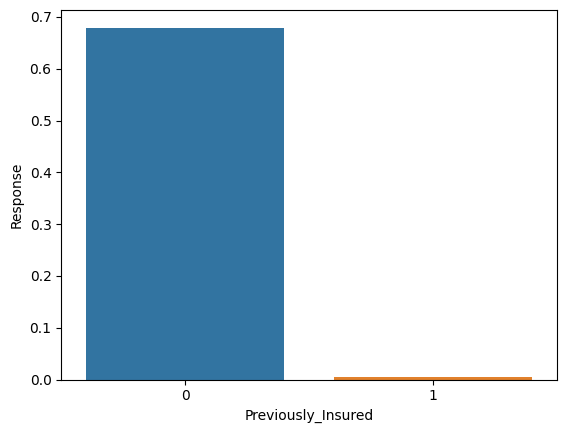

In [11]:
sns.barplot(data = df_vis, x = 'Previously_Insured', y = 'Response')

<Axes: xlabel='Vehicle_Age', ylabel='Response'>

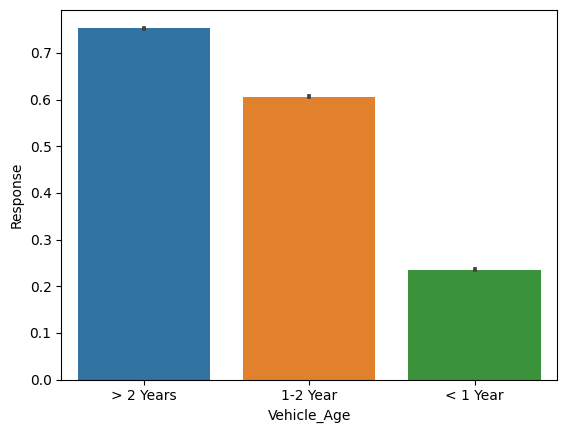

In [15]:
sns.barplot(data = df_vis, x = 'Vehicle_Age', y= 'Response')

<Axes: xlabel='Vehicle_Damage', ylabel='Response'>

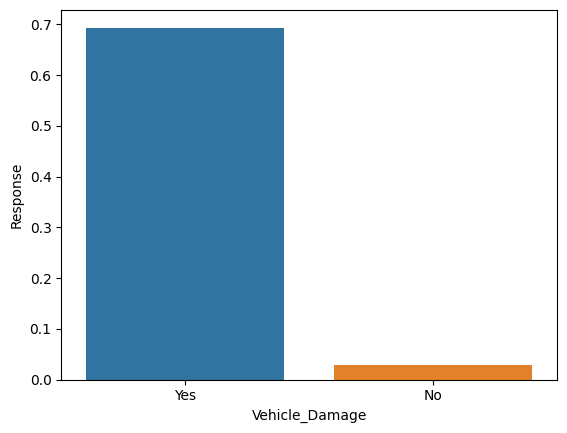

In [16]:
sns.barplot(data = df_vis, x = 'Vehicle_Damage', y= 'Response')

<Axes: xlabel='Response', ylabel='Annual_Premium'>

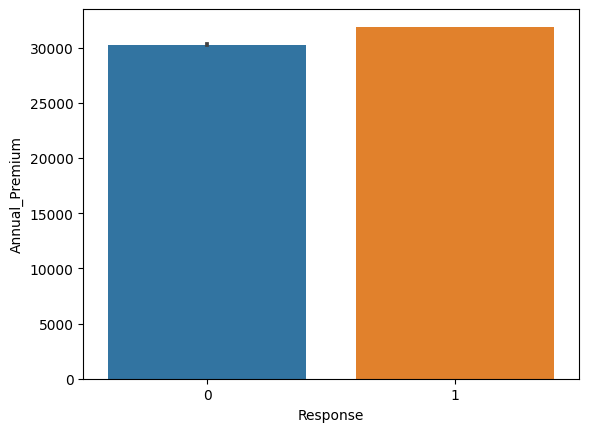

In [18]:
sns.barplot(data = df_vis, x = 'Response', y = 'Annual_Premium')

<Axes: >

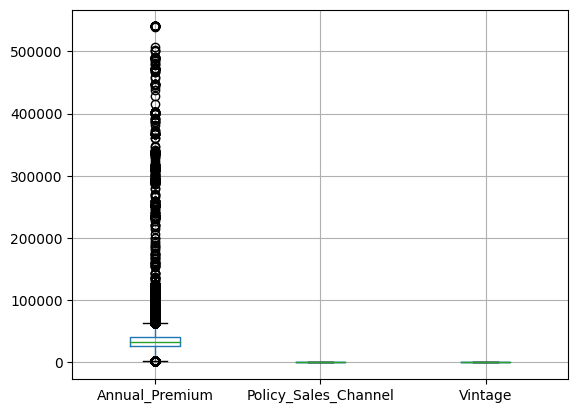

In [16]:
df_vis[['Annual_Premium','Policy_Sales_Channel','Vintage']].boxplot()

Need to remove the outliers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Annual_Premium', ylabel='Count'>

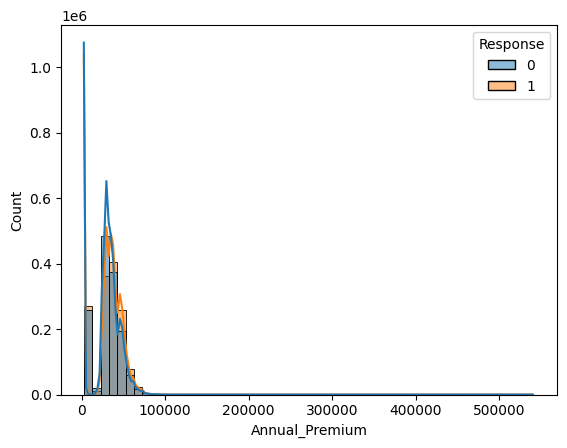

In [38]:
sns.histplot(data = df_vis, x = 'Annual_Premium',binwidth = 10000, hue = 'Response', kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Annual_Premium', ylabel='Count'>

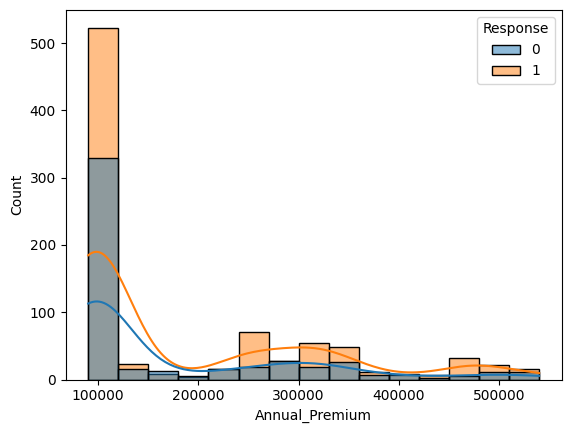

In [42]:
sns.histplot(data = df_vis[df_vis['Annual_Premium']>90000], x = 'Annual_Premium', hue = 'Response', kde = True)

In [46]:
df_vis['Policy_Sales_Channel'].nunique()

147

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Policy_Sales_Channel', ylabel='Count'>

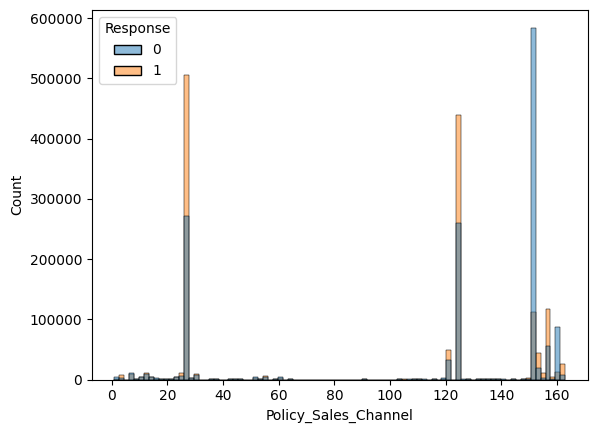

In [47]:
sns.histplot(data = df_vis, x = 'Policy_Sales_Channel',hue = 'Response' )

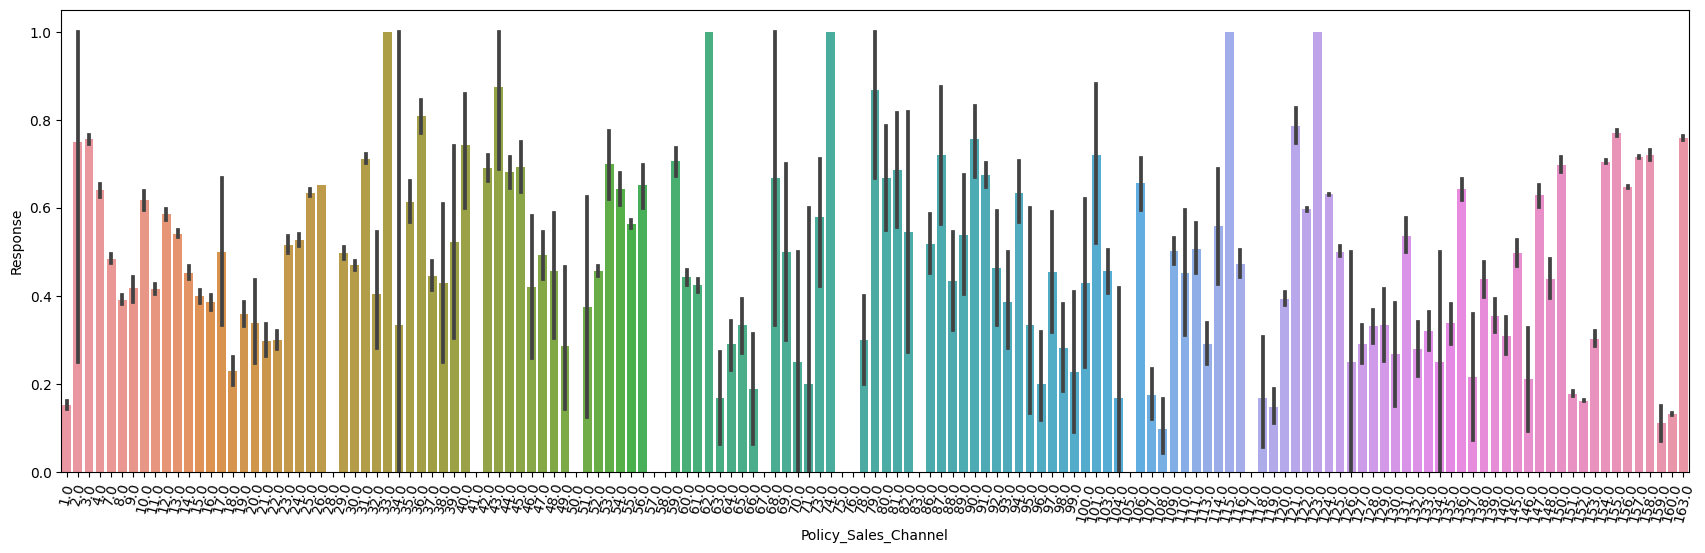

In [56]:
plt.figure(figsize=(21, 6))
sns.barplot(data = df_vis, x = 'Policy_Sales_Channel', y ='Response')
plt.xticks(rotation=75)
plt.show()

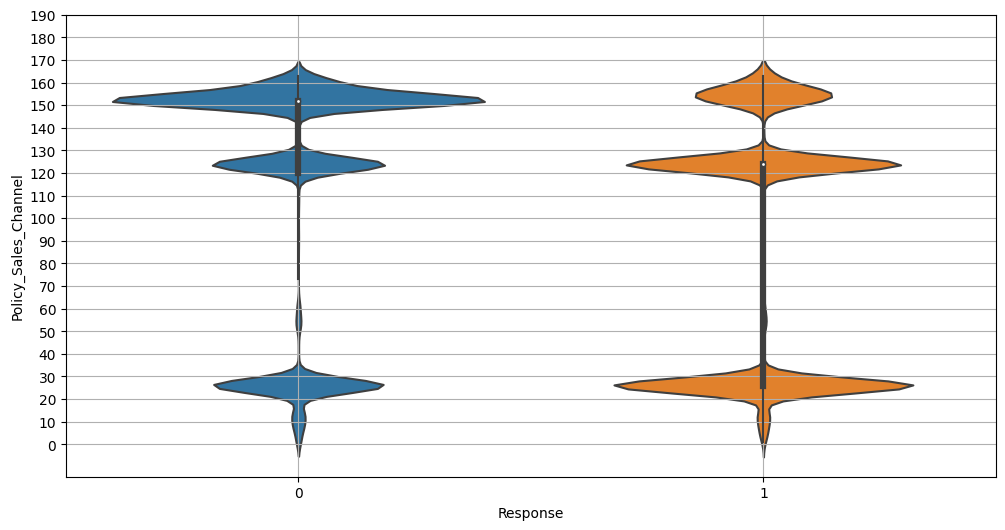

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_vis, x='Response', y='Policy_Sales_Channel')
plt.yticks(np.arange(0, 200, 10))
plt.grid(True)
plt.show()

Feature Engineering could be performed breaking policy sales channel into different classes as per the violin plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Vintage', ylabel='Count'>

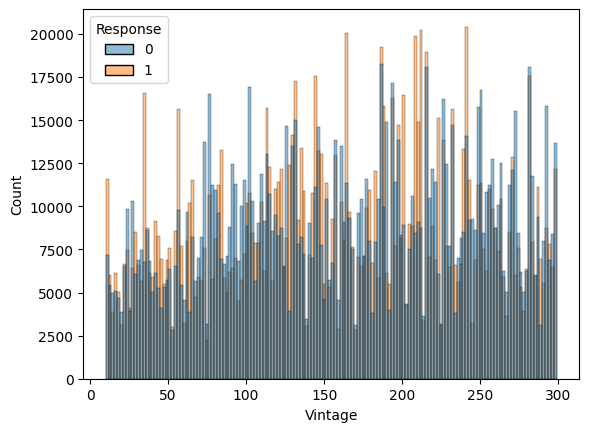

In [59]:
sns.histplot(data = df_vis, x= 'Vintage', hue = 'Response')

<Axes: xlabel='Response', ylabel='Vintage'>

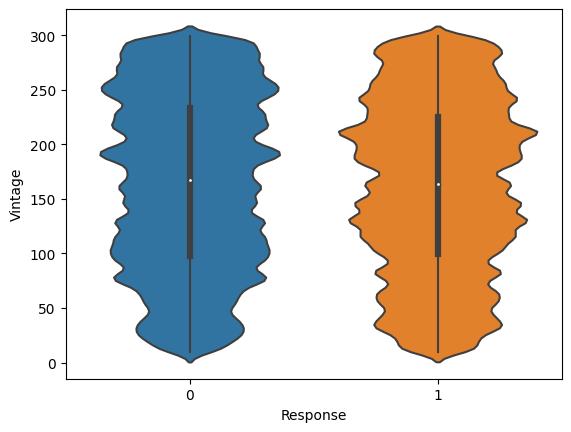

In [61]:
sns.violinplot(data = df_vis, y= 'Vintage', x = 'Response')

<Axes: xlabel='Response', ylabel='Vintage'>

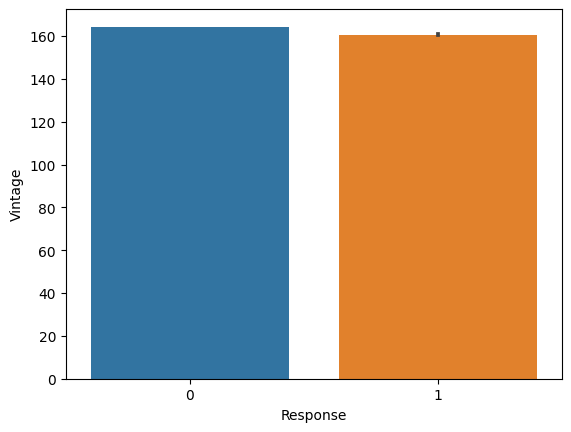

In [8]:
sns.barplot(data = df_vis, y= 'Vintage', x = 'Response')

<Axes: >

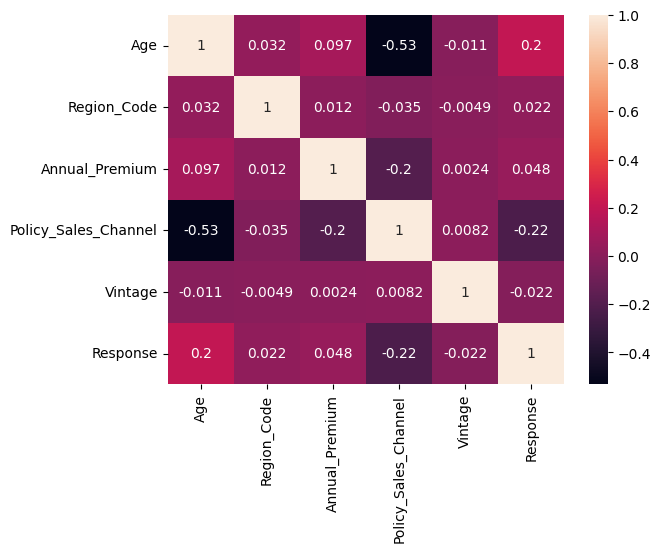

In [9]:
sns.heatmap(df_vis[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage','Response']].corr(),annot = True)

# Data Pre-processing

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

/tmp/ipykernel_33/3334265869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])


In [4]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [5]:
df = df.replace(['1-2 Year','< 1 Year','> 2 Years'],[1,0,2])

/tmp/ipykernel_33/835586199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['1-2 Year','< 1 Year','> 2 Years'],[1,0,2])


In [6]:
df = df.replace(['Yes','No'] , [1,0])

/tmp/ipykernel_33/3386661767.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Yes','No'] , [1,0])


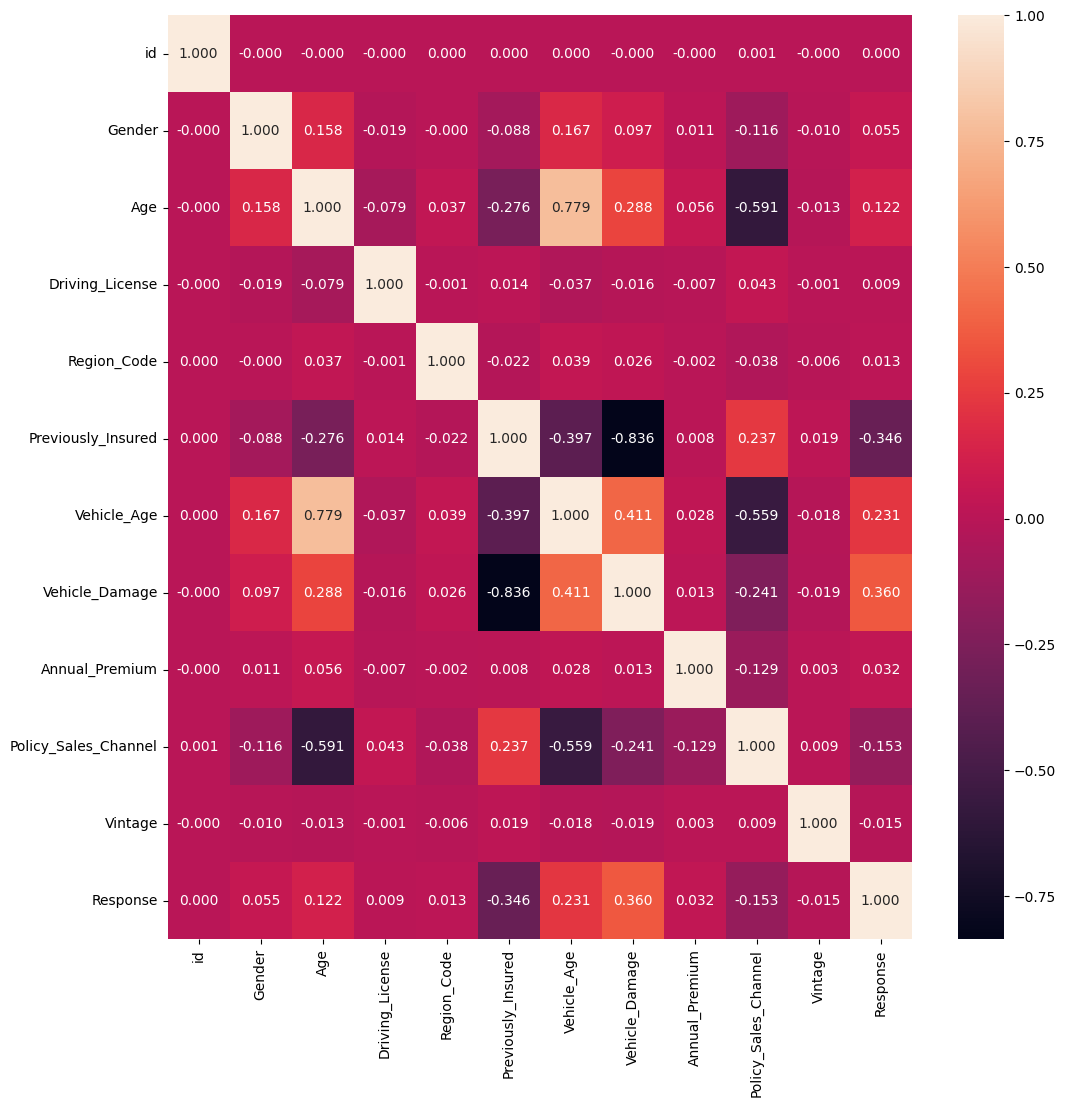

In [26]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True,fmt=".3f")
plt.show()

In [28]:
df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [7]:
# def sales_func(row):
#     if ((row['Policy_Sales_Channel'] < 40) & (row['Policy_Sales_Channel'] > 18)):
#         row['Policy_Sales_New'] = 1
#     elif row['Policy_Sales_Channel'] > 140:
#         row['Policy_Sales_New'] = 0
#     elif row['Policy_Sales_Channel'] > 110:
#         row['Policy_Sales_New'] = 1
#     else:
#         row['Policy_Sales_New'] = 0.5
#     return row

# df = df.apply(sales_func, axis=1)

df['Policy_Sales_New'] = 0.5 

df.loc[(df['Policy_Sales_Channel'] < 40) & (df['Policy_Sales_Channel'] > 18), 'Policy_Sales_New'] = 1
df.loc[df['Policy_Sales_Channel'] > 140, 'Policy_Sales_New'] = 0
df.loc[(df['Policy_Sales_Channel'] > 110) & (df['Policy_Sales_Channel'] <= 140), 'Policy_Sales_New'] = 1

In [8]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Sales_New
0,0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0,1.0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1,1.0
2,2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0,0.0
3,3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0,0.0
4,4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0,0.0


In [9]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['id','Response'],axis = 1)
y = df['Response']

In [13]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Policy_Sales_New
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,1.0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1.0
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0.0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0.0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, stratify = y)

In [11]:
y_train.value_counts()

Response
0    7567304
1    1061294
Name: count, dtype: int64

In [12]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    7567304
1    1061294
Name: count, dtype: int64

Response
1    7567304
0    7567304
Name: count, dtype: int64


Pehle smote laga ke train data ko evenly distribute kara diya Response pr Ab X_test, y_test ko as it is rehne denge. Using X_train_smote and y_train_smote hamlog wapis isko training set and cross validation set me todenge jisse bias variance analysis and error analysis asan hoga. Then finally jo model banega usko X_test and y_test pr laga ke we will check our performance

In [13]:
X_train_smote.shape

(15134608, 11)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
x_train, x_cv, y_train, y_cv = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)

In [16]:
print("Training set size: ",x_train.shape)
print("Validation set size: ", x_cv.shape)
print("Test set size: ", X_test_scaled.shape)

Training set size:  (10594225, 11)
Validation set size:  (4540383, 11)
Test set size:  (2876200, 11)


In [17]:
print("Percentage of data of class 1")
print("Train : ", round((y_train.value_counts()[1]/y_train.shape[0])*100,3))
print("CV : ", round((y_cv.value_counts()[1]/y_cv.shape[0])*100,3))
print("Test: ",round((y_test.value_counts()[1]/y_test.shape[0])*100,3))

Percentage of data of class 1
Train :  49.999
CV :  50.002
Test:  12.3


Imbalance is present in test data which is necessary to observe our results on skewed data

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_cv_pred = model.predict(x_cv)
    y_cv_prob = model.predict_proba(x_cv)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_cv,x_cv_pred)*100
    c = precision_score(y_cv,x_cv_pred)
    d = recall_score(y_cv,x_cv_pred)
    e = roc_auc_score(y_cv, y_cv_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Validation Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_cv,x_cv_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_cv,x_cv_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.5699119095545
Accuracy_Score of LogisticRegression() model on Validation Data is: 77.59215467065223
Precision Score of LogisticRegression() model is: 0.7071078569119151
Recall Score of LogisticRegression() model is: 0.9421063851716517
AUC Score of LogisticRegression() model is: 0.8430868630858808

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73   2270029
           1       0.71      0.94      0.81   2270354

    accuracy                           0.78   4540383
   macro avg       0.81      0.78      0.77   4540383
weighted avg       0.81      0.78      0.77   4540383


------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


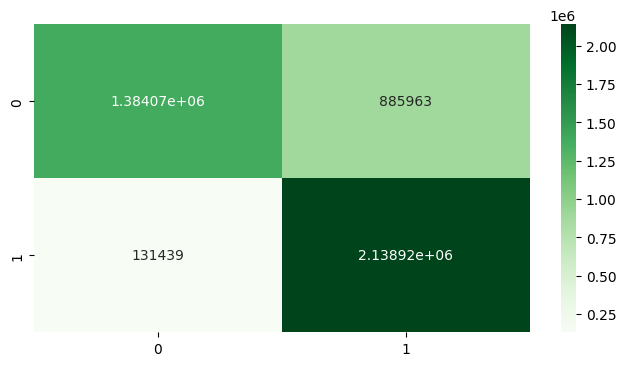

In [97]:
model_prediction(LogisticRegression())

Accuracy_Score of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model on Training Data is: 77.57078030719566
Accuracy_Score of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model on Validation Data is: 77.59318982561604
Precision Score of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model is: 0.7071046026183464
Recall Score of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model is: 0.9421521930060246
AUC Score of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model is: 0.8430863256695211

------------------------------------------------------------------------
Classification Report of LogisticRegression(C=0.55, penalty='l1', solver='liblinear') model is:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73   2270029
           1       0.71      0.94      0.81   2270354

    accuracy                           0.78   4540383
   macro avg       0.81      0.78      0.77 

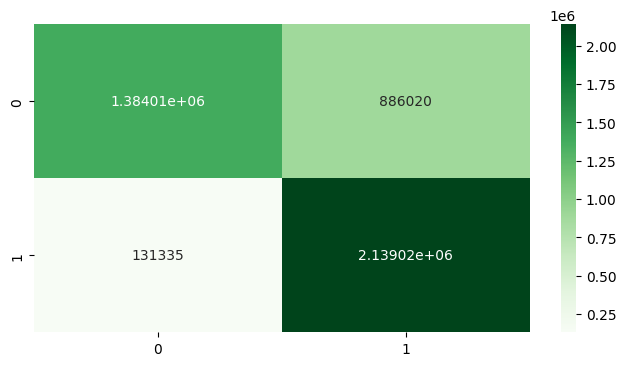

In [98]:
model_prediction(LogisticRegression(penalty = 'l1',C = 0.55,solver = 'liblinear'))

Accuracy_Score of GaussianNB() model on Training Data is: 78.11046112386701
Accuracy_Score of GaussianNB() model on Validation Data is: 78.1435839223255
Precision Score of GaussianNB() model is: 0.7047857182902314
Recall Score of GaussianNB() model is: 0.9687951376411817
AUC Score of GaussianNB() model is: 0.8406234055070974

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.95      0.59      0.73   2269551
           1       0.70      0.97      0.82   2270832

    accuracy                           0.78   4540383
   macro avg       0.83      0.78      0.77   4540383
weighted avg       0.83      0.78      0.77   4540383


------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


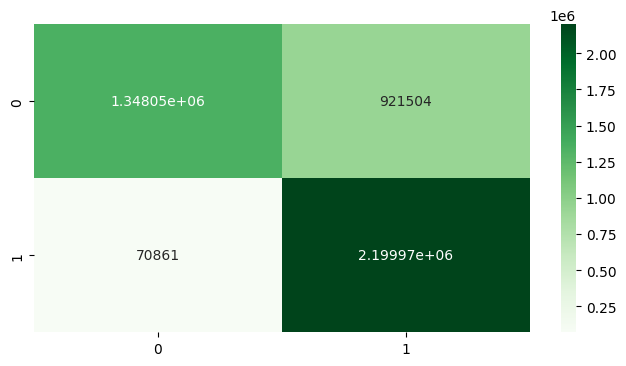

In [27]:
model_prediction(GaussianNB())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 99.89243196175275
Accuracy_Score of DecisionTreeClassifier() model on Validation Data is: 87.63648353013392
Precision Score of DecisionTreeClassifier() model is: 0.8659501000781359
Recall Score of DecisionTreeClassifier() model is: 0.8906770734250706
AUC Score of DecisionTreeClassifier() model is: 0.8770658900836913

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87   2269551
           1       0.87      0.89      0.88   2270832

    accuracy                           0.88   4540383
   macro avg       0.88      0.88      0.88   4540383
weighted avg       0.88      0.88      0.88   4540383


------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


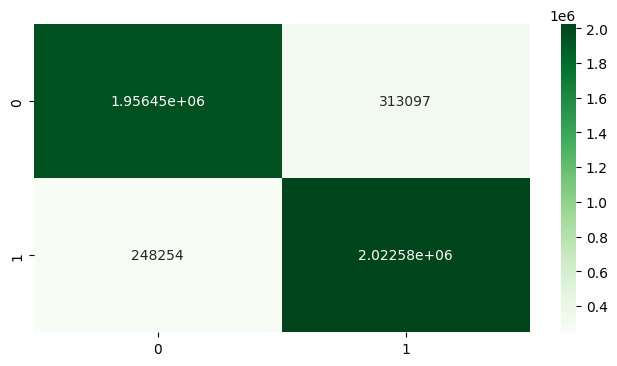

In [28]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of DecisionTreeClassifier(max_depth=30) model on Training Data is: 90.05279763267252
Accuracy_Score of DecisionTreeClassifier(max_depth=30) model on Validation Data is: 86.44894054091912
Precision Score of DecisionTreeClassifier(max_depth=30) model is: 0.8316071578795563
Recall Score of DecisionTreeClassifier(max_depth=30) model is: 0.9141653807943521
AUC Score of DecisionTreeClassifier(max_depth=30) model is: 0.9227317997083369

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier(max_depth=30) model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.86   2269551
           1       0.83      0.91      0.87   2270832

    accuracy                           0.86   4540383
   macro avg       0.87      0.86      0.86   4540383
weighted avg       0.87      0.86      0.86   4540383


------------------------------------------------------------------------
Confu

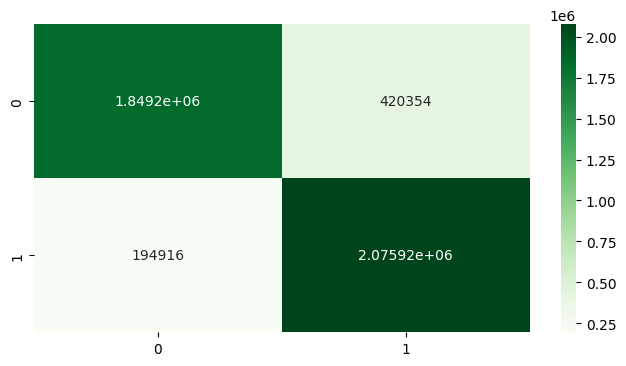

In [33]:
model_prediction(DecisionTreeClassifier(max_depth=30 ))

Accuracy_Score of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model on Training Data is: 91.1671311492818
Accuracy_Score of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model on Validation Data is: 86.93471453839908
Precision Score of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model is: 0.844648230841166
Recall Score of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model is: 0.9052695223600865
AUC Score of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model is: 0.928868437806577

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier(max_depth=35, min_samples_split=10) model is:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86   2269551
           1       0.84      0.91      0.87   2270832

    accuracy                           0.87   4540383
   macro avg       0.87      0.87      0.87   4540383
weigh

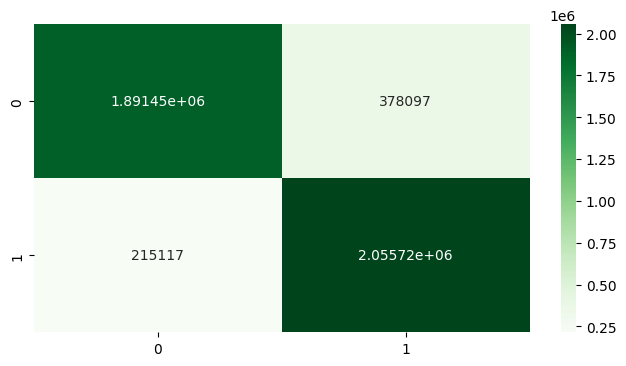

In [37]:
model_prediction(DecisionTreeClassifier(max_depth=35, min_samples_split=10 ))

Accuracy_Score of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model on Training Data is: 90.56819163270555
Accuracy_Score of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model on Validation Data is: 86.84842225865087
Precision Score of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model is: 0.8446930816718923
Recall Score of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model is: 0.9030857412613527
AUC Score of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model is: 0.9338550117273968

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier(max_depth=35, min_samples_split=15) model is:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86   2269551
           1       0.84      0.90      0.87   2270832

    accuracy                           0.87   4540383
   macro avg       0.87      0.87      0.87   4540383
we

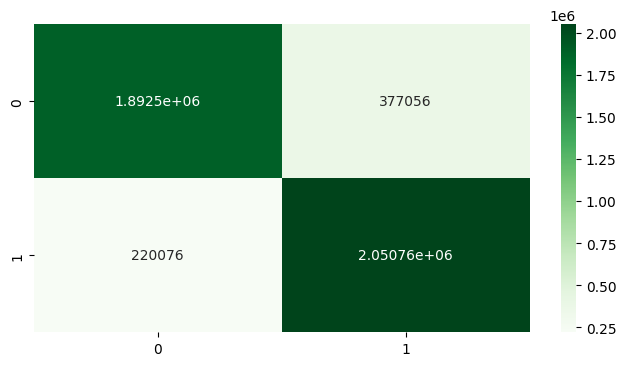

In [38]:
model_prediction(DecisionTreeClassifier(max_depth=35, min_samples_split=15 ))

Accuracy_Score of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model on Training Data is: 86.80308375553662
Accuracy_Score of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model on Validation Data is: 85.65369925841057
Precision Score of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model is: 0.8240736479079609
Recall Score of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model is: 0.9067262571603711
AUC Score of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model is: 0.934529388126869

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier(max_depth=25, min_samples_split=20) model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85   2269551
           1       0.82      0.91      0.86   2270832

    accuracy                           0.86   4540383
   macro avg       0.86      0.86      0.86   4540383
wei

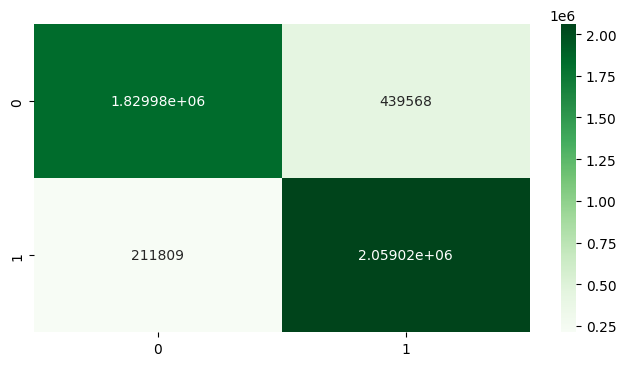

In [39]:
model_prediction(DecisionTreeClassifier(max_depth=25, min_samples_split=20 ))

Accuracy_Score of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model on Training Data is: 88.05412382689626
Accuracy_Score of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model on Validation Data is: 85.79976623117477
Precision Score of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model is: 0.8154568601560597
Recall Score of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model is: 0.9255932790691224
AUC Score of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model is: 0.9377899850985558

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(max_depth=30, min_samples_split=20, n_estimators=10) model is:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85   2269150
           1       0.82      0.93      0.87   2271233

    accu

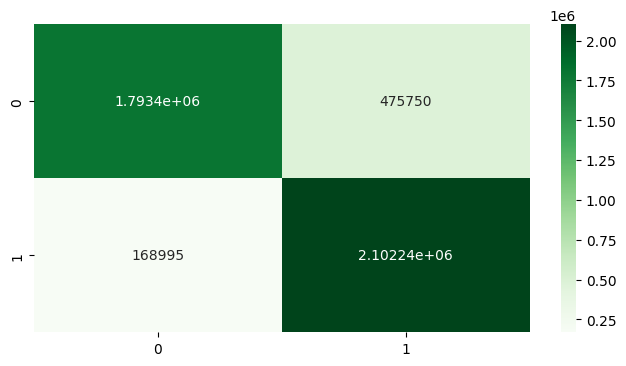

In [22]:
model_prediction(RandomForestClassifier(n_estimators = 10,max_depth = 30, min_samples_split = 20))

Accuracy_Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model on Training Data is: 93.09650304765096
Accuracy_Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model on Validation Data is: 87.29043342819317
Precision Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.8392772317755917
Recall Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.9226054746474712
AUC Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.9509685064093785

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87   2269150
           1       0.84      0.92      0.88   2271233

    accu

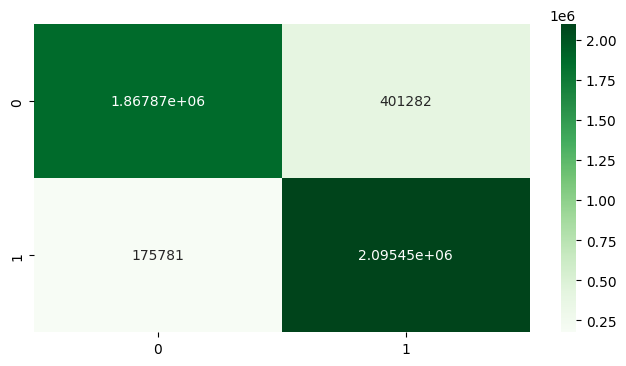

In [23]:
model_prediction(RandomForestClassifier(n_estimators = 20,max_depth = 40, min_samples_split = 10))

Accuracy_Score of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model on Training Data is: 90.60306912492419
Accuracy_Score of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model on Validation Data is: 86.80247899791713
Precision Score of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model is: 0.829484585895585
Recall Score of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model is: 0.9266627422197546
AUC Score of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model is: 0.947135148365222

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(max_depth=35, min_samples_split=15, n_estimators=20) model is:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86   2269150
           1       0.83      0.93      0.88   2271233

    accura

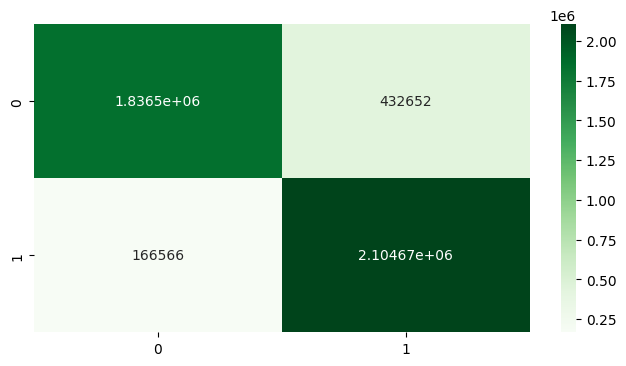

In [24]:
model_prediction(RandomForestClassifier(n_estimators = 20,max_depth = 35, min_samples_split = 15))

Accuracy_Score of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model on Training Data is: 81.48143918030813
Accuracy_Score of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model on Validation Data is: 81.4878172171819
Precision Score of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model is: 0.763512699622461
Recall Score of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model is: 0.9125871277847759
AUC Score of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model is: 0.8933114691493512

------------------------------------------------------------------------
Classification Report of HistGradientBoostingClassifier(max_depth=35, max_iter=15) model is:
              precision    recall  f1-score   support

           0       0.89      0.72      0.79   2269150
           1       0.76      0.91      0.83   2271233

    accuracy                           0.81   4540383
   macro avg       0.83      0.81      0.81   4540383
weighted a

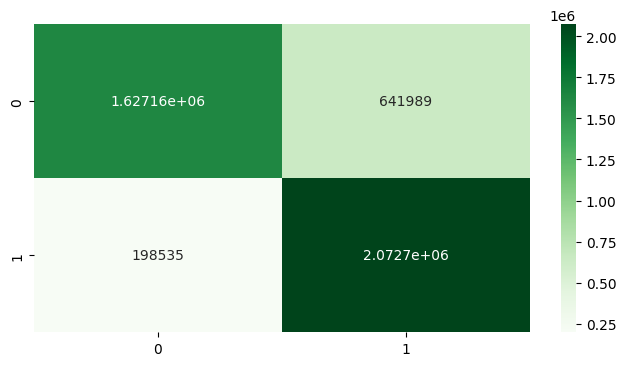

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_prediction(HistGradientBoostingClassifier(max_iter = 15,max_depth = 35))

Accuracy_Score of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model on Training Data is: 82.79060525899725
Accuracy_Score of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model on Validation Data is: 82.80623022330936
Precision Score of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model is: 0.7754224917497238
Recall Score of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model is: 0.923846210406418
AUC Score of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model is: 0.911248258873836

------------------------------------------------------------------------
Classification Report of HistGradientBoostingClassifier(max_depth=55, max_iter=35) model is:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81   2269150
           1       0.78      0.92      0.84   2271233

    accuracy                           0.83   4540383
   macro avg       0.84      0.83      0.83   4540383
weighted a

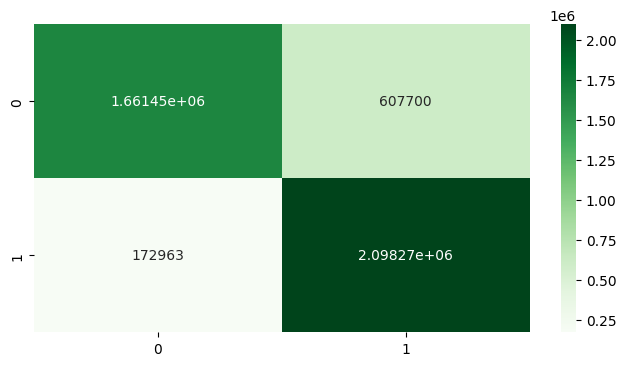

In [27]:
model_prediction(HistGradientBoostingClassifier(max_iter = 35,max_depth = 55))

Accuracy_Score of HistGradientBoostingClassifier() model on Training Data is: 84.02275768166147
Accuracy_Score of HistGradientBoostingClassifier() model on Validation Data is: 84.02134797879386
Precision Score of HistGradientBoostingClassifier() model is: 0.798138655003493
Recall Score of HistGradientBoostingClassifier() model is: 0.9109721459665301
AUC Score of HistGradientBoostingClassifier() model is: 0.9259522804329905

------------------------------------------------------------------------
Classification Report of HistGradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83   2269150
           1       0.80      0.91      0.85   2271233

    accuracy                           0.84   4540383
   macro avg       0.85      0.84      0.84   4540383
weighted avg       0.85      0.84      0.84   4540383


------------------------------------------------------------------------
Confusion Matrix of HistGradie

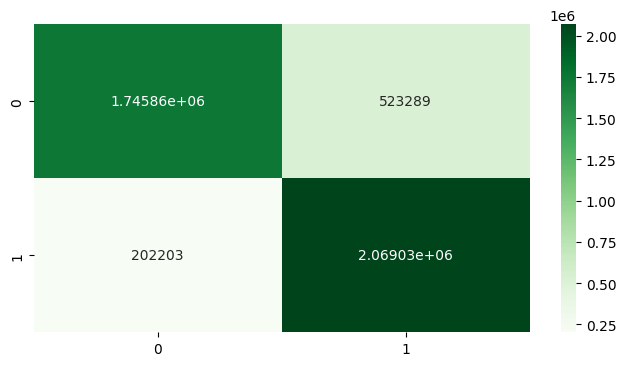

In [29]:
model_prediction(HistGradientBoostingClassifier())

In [22]:
model1 = RandomForestClassifier(n_estimators = 20,max_depth = 40, min_samples_split = 10)

In [23]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20)

Accuracy_Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model on Training Data is: 93.00406589439058
Accuracy_Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model on Test Data is: 79.88154509422154
Precision Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.3325824126738334
Recall Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.6314050287620313
AUC Score of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is: 0.8474948005867883

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=20) model is:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88   2522435
           1       0.33      0.63      0.44    353765

    accuracy  

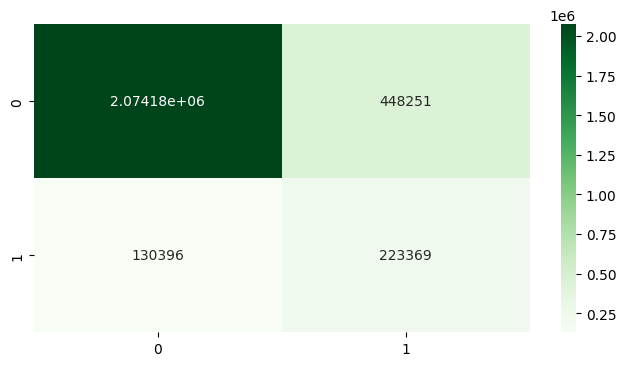

In [27]:
x_train_pred = model1.predict(x_train)
x_test_pred = model1.predict(X_test_scaled)
y_test_prob = model1.predict_proba(X_test_scaled)[:, 1]
a = accuracy_score(y_train,x_train_pred)*100
b = accuracy_score(y_test,x_test_pred)*100
c = precision_score(y_test,x_test_pred)
d = recall_score(y_test,x_test_pred)
e = roc_auc_score(y_test, y_test_prob)
print(f"Accuracy_Score of {model1} model on Training Data is:",a)
print(f"Accuracy_Score of {model1} model on Test Data is:",b)
print(f"Precision Score of {model1} model is:",c)
print(f"Recall Score of {model1} model is:",d)
print(f"AUC Score of {model1} model is:", e)
print("\n------------------------------------------------------------------------")
print(f"Classification Report of {model1} model is:")
print(classification_report(y_test,x_test_pred))
print("\n------------------------------------------------------------------------")
print(f"Confusion Matrix of {model1} model is:")
cm = confusion_matrix(y_test,x_test_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
plt.show()


# Testing pipeline

In [28]:
df_test = pd.read_csv(r"/kaggle/input/playground-series-s4e7/test.csv")

In [29]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [30]:
index = df_test['id']

In [31]:
df_test['Gender'] = df_test['Gender'].replace(['Male','Female'],[1,0])
df_test = df_test.replace(['1-2 Year','< 1 Year','> 2 Years'],[1,0,2])
df_test = df_test.replace(['Yes','No'] , [1,0])

df_test['Policy_Sales_New'] = 0.5 

df_test.loc[(df_test['Policy_Sales_Channel'] < 40) & (df_test['Policy_Sales_Channel'] > 18), 'Policy_Sales_New'] = 1
df_test.loc[df_test['Policy_Sales_Channel'] > 140, 'Policy_Sales_New'] = 0
df_test.loc[(df['Policy_Sales_Channel'] > 110) & (df_test['Policy_Sales_Channel'] <= 140), 'Policy_Sales_New'] = 1

/tmp/ipykernel_33/185050744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Gender'] = df_test['Gender'].replace(['Male','Female'],[1,0])
/tmp/ipykernel_33/185050744.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(['1-2 Year','< 1 Year','> 2 Years'],[1,0,2])
/tmp/ipykernel_33/185050744.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [34]:
X_pred = df_test.drop('id',axis=1)
X_pred = scaler.transform(X_pred)

In [36]:
predictions = model1.predict(X_pred)

In [39]:
submission = pd.DataFrame({'Response': predictions}, index = index)

In [40]:
submission

,Response
id,
11504798,0
11504799,1
11504800,0
11504801,0
11504802,0
...,...
19174659,0
19174660,0
19174661,0


In [41]:
submission.to_csv("Submission1.csv")